In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import os
# import random
# !pip install tensorflow
# import tensorflow as tf
# from pathlib import Path
# import keras
# from tensorflow.keras import applications
# from tensorflow.keras import layers
# from tensorflow.keras import losses
# from tensorflow.keras import optimizers
# from tensorflow.keras import metrics
# from tensorflow.keras import Model
# from tensorflow.keras.applications import resnet
# from keras.models import load_model

# from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
# !pip install opencv-python
# import os
# import cv2
# from numpy.random import randint
# !pip install mtcnn
# import mtcnn
# from mtcnn.mtcnn import MTCNN

# import matplotlib.pyplot as plt

In [ ]:
# s = '/content/drive/MyDrive/gt_db/'
# detector = MTCNN()

# def process(pixels):
#     results = detector.detect_faces(pixels)
#     x1, y1, width, height = results[0]['box']
#     x1, y1 = abs(x1), abs(y1)
#     x2, y2 = x1 + width, y1 + height
#     img = pixels[y1:y2, x1:x2]
#     img = cv2.resize(img, (160,160), interpolation=cv2.INTER_CUBIC)
#     return img

# for folder in os.listdir(s):
#     for image in os.listdir(s + folder):
#         img = cv2.imread(file_path)
#         img = process(img)
#         img = cv2.resize(img, (160,160), interpolation=cv2.INTER_CUBIC)
#         cv2.imwrite((s + folder + '/' + image), img)

# folder_list = []
# file_list = []
# file_list_temp = []
# for folder in os.listdir(s):
#     folder_path = s + folder + "/"
#     folder_list.append(folder_path)

# a = 0
# p = 0
# n = 0
# #In folder 'triplets' created manually
# #Generate 10 Anchor in Anchor folder, 10 Positive in Positive folder, 10 Negative in Negative folder
# for l in range(10): #iterating over 10 subjects

#     folder_path = folder_list[l]
#     for file in os.listdir(folder_path): #creating list of all image names of a subject's folder
#         file_path = folder_path+file
#         file_list.append(file_path)

#     for i in range(10): #selecting first 10 images as anchor
#         file_path = file_list[i]
#         img = cv2.imread(file_path)
#         for j in range(720): #creating 720 copies of each of the 10 images
#             cv2.imwrite(("/content/drive/MyDrive/triplets/Anchor/"+"A_"+str(a)+".jpg"), img)
#             a += 1

#         for j in range(1,11): #selecting 10 positive images from the current subject folder as positive
#                               #number of positive images for every anchor image = 720 (72*10)
#             file_path = file_list[(i+j)%10]
#             img = cv2.imread(file_path)
#             for k in range(72): #creating 72 copies of each of the 10 images
#                 cv2.imwrite(("/content/drive/MyDrive/triplets/Positive/"+"P_"+str(p)+".jpg"), img)
#                 p += 1

#             for k in range(10): #iterating over 10 subjects
#                                 #number of negative images for every positive image = 72 (8*9=72)
#                 if k!=l: #ignoring current subject, select 9 negative remaining subject folders
#                     folder_path = folder_list[k]
#                     for file in os.listdir(folder_path):
#                         file_path = folder_path+file
#                         file_list_temp.append(file_path)

#                     idx = randint(0, 14, 8) #selecting random 8 negative images from the current negative subject folder

#                     for m in idx:
#                         file_path = file_list_temp[m]
#                         img = cv2.imread(file_path)
#                         cv2.imwrite(("/content/drive/MyDrive/triplets/Negative/"+"N_"+str(n)+".jpg"), img)
#                         n += 1
#                     file_list_temp = []
#     file_list = []

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import os
# import random
# import tensorflow as tf
# from pathlib import Path
# import keras
# from tensorflow.keras import applications
# from tensorflow.keras import layers
# from tensorflow.keras import losses
# from tensorflow.keras import optimizers
# from tensorflow.keras import metrics
# from tensorflow.keras import Model
# from tensorflow.keras.applications import resnet
# from keras.models import load_model
# import cv2
# from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
# target_shape = (160, 160)

# anchor_images_path = '/content/drive/MyDrive/triplets/Anchor/'
# positive_images_path = '/content/drive/MyDrive/triplets/Positive/'
# negative_images_path = '/content/drive/MyDrive/triplets/Negative/'

# def preprocess_image(filename):
#     """
#     Load the specified file as a JPEG image, preprocess it and
#     resize it to the target shape.
#     """

#     image_string = tf.io.read_file(filename)
#     image = tf.image.decode_jpeg(image_string, channels=3)
#     image = tf.image.convert_image_dtype(image, tf.float32)
#     image = tf.image.per_image_standardization(image)
#     return image


# def preprocess_triplets(anchor, positive, negative):
#     """
#     Given the filenames corresponding to the three images, load and
#     preprocess them.
#     """

#     return (
#         preprocess_image(anchor),
#         preprocess_image(positive),
#         preprocess_image(negative),
#     )

# anchor_images = [(anchor_images_path+f) for f in os.listdir(anchor_images_path)]

# positive_images = [(positive_images_path+f) for f in os.listdir(positive_images_path)]

# negative_images = [(negative_images_path+f) for f in os.listdir(negative_images_path)]

# image_count = len(anchor_images)

# anchor_dataset = tf.data.Dataset.from_tensor_slices(anchor_images)
# positive_dataset = tf.data.Dataset.from_tensor_slices(positive_images)
# negative_dataset = tf.data.Dataset.from_tensor_slices(negative_images)

# dataset = tf.data.Dataset.zip((anchor_dataset, positive_dataset, negative_dataset))
# dataset = dataset.shuffle(buffer_size=1024)
# dataset = dataset.map(preprocess_triplets)

# # Let's now split our dataset in train and validation.
# train_dataset = dataset.take(round(image_count * 0.8))
# val_dataset = dataset.skip(round(image_count * 0.8))

# train_dataset = train_dataset.batch(32, drop_remainder=False)
# train_dataset = train_dataset.prefetch(8)

# val_dataset = val_dataset.batch(32, drop_remainder=False)
# val_dataset = val_dataset.prefetch(8)

# embedding = keras.models.load_model('/content/drive/MyDrive/facenet_keras.h5',compile=False)
# embedding.load_weights('/content/drive/MyDrive/facenet_keras_weights.h5')

# class DistanceLayer(layers.Layer):
#     """
#     This layer is responsible for computing the distance between the anchor
#     embedding and the positive embedding, and the anchor embedding and the
#     negative embedding.
#     """

#     def __init__(self, **kwargs):
#         super().__init__(**kwargs)

#     def call(self, anchor, positive, negative):
#         ap_distance = tf.reduce_sum(tf.square(anchor - positive), -1)
#         an_distance = tf.reduce_sum(tf.square(anchor - negative), -1)
#         return (ap_distance, an_distance)


# anchor_input = layers.Input(name="anchor", shape=target_shape + (3,))
# positive_input = layers.Input(name="positive", shape=target_shape + (3,))
# negative_input = layers.Input(name="negative", shape=target_shape + (3,))

# distances = DistanceLayer()(
#     embedding(anchor_input),
#     embedding(positive_input),
#     embedding(negative_input),
# )

# siamese_network = Model(
#     inputs=[anchor_input, positive_input, negative_input], outputs=distances
# )

# class SiameseModel(Model):
#     """The Siamese Network model with a custom training and testing loops.

#     Computes the triplet loss using the three embeddings produced by the
#     Siamese Network.

#     The triplet loss is defined as:
#        L(A, P, N) = max(‖f(A) - f(P)‖² - ‖f(A) - f(N)‖² + margin, 0)
#     """

#     def __init__(self, siamese_network, margin=10000000):
#         super(SiameseModel, self).__init__()
#         self.siamese_network = siamese_network
#         self.margin = margin
#         self.loss_tracker = metrics.Mean(name="loss")

#     def call(self, inputs):
#         return self.siamese_network(inputs)

#     def train_step(self, data):
#         # GradientTape is a context manager that records every operation that
#         # you do inside. We are using it here to compute the loss so we can get
#         # the gradients and apply them using the optimizer specified in
#         # `compile()`.
#         with tf.GradientTape() as tape:
#             loss = self._compute_loss(data)

#         # Storing the gradients of the loss function with respect to the
#         # weights/parameters.
#         gradients = tape.gradient(loss, self.siamese_network.trainable_weights)

#         # Applying the gradients on the model using the specified optimizer
#         self.optimizer.apply_gradients(
#             zip(gradients, self.siamese_network.trainable_weights)
#         )

#         # Let's update and return the training loss metric.
#         self.loss_tracker.update_state(loss)
#         return {"loss": self.loss_tracker.result()}

#     def test_step(self, data):
#         loss = self._compute_loss(data)

#         # Let's update and return the loss metric.
#         self.loss_tracker.update_state(loss)
#         return {"loss": self.loss_tracker.result()}

#     def _compute_loss(self, data):
#         # The output of the network is a tuple containing the distances
#         # between the anchor and the positive example, and the anchor and
#         # the negative example.
#         ap_distance, an_distance = self.siamese_network(data)

#         # Computing the Triplet Loss by subtracting both distances and
#         # making sure we don't get a negative value.
#         loss = ap_distance - an_distance
#         loss = tf.maximum(loss + self.margin, 0.0)
#         return loss

#     @property
#     def metrics(self):
#         # We need to list our metrics here so the `reset_states()` can be
#         # called automatically.
#         return [self.loss_tracker]

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                               patience=5, min_lr=0.00001)
# model_checkpoint_callback = ModelCheckpoint(filepath='facenetweights/model_.{epoch:02d}-{val_loss:.2f}.h5',
#                                             save_weights_only = True,
#                                             period = 2,
#                                             verbose = 1,
#                                             save_best_only=False)
# siamese_model = SiameseModel(siamese_network)
# siamese_model.compile(optimizer=optimizers.Adam())
# siamese_model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks = [model_checkpoint_callback])

# siamese_network.summary()
# siamese_network.layers[3].save_weights('/content/drive/MyDrive/weights.h5')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from pathlib import Path
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import Model
from tensorflow.keras.applications import resnet


target_shape = (200, 200)

In [ ]:
cache_dir = Path(Path.home()) / ".keras"
anchor_images_path = cache_dir / "left"
positive_images_path = cache_dir / "right"

In [ ]:
!gdown --id 1jvkbTr_giSP3Ru8OwGNCg6B4PvVbcO34
!gdown --id 1EzBZUb_mh_Dp_FKD0P4XiYYSd0QBH5zW
!unzip -oq left.zip -d $cache_dir
!unzip -oq right.zip -d $cache_dir

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1jvkbTr_giSP3Ru8OwGNCg6B4PvVbcO34
To: /content/left.zip
100% 104M/104M [00:04<00:00, 22.7MB/s] 
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1EzBZUb_mh_Dp_FKD0P4XiYYSd0QBH5zW
To: /content/right.zip
100% 104M/104M [00:05<00:00, 20.6MB/s] 


In [ ]:
def preprocess_image(filename):
    """
    Load the specified file as a JPEG image, preprocess it and
    resize it to the target shape.
    """

    image_string = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image_string, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, target_shape)
    return image


def preprocess_triplets(anchor, positive, negative):
    """
    Given the filenames corresponding to the three images, load and
    preprocess them.
    """

    return (
        preprocess_image(anchor),
        preprocess_image(positive),
        preprocess_image(negative),
    )

In [ ]:
# We need to make sure both the anchor and positive images are loaded in
# sorted order so we can match them together.
anchor_images = sorted(
    [str(anchor_images_path / f) for f in os.listdir(anchor_images_path)]
)

positive_images = sorted(
    [str(positive_images_path / f) for f in os.listdir(positive_images_path)]
)

image_count = len(anchor_images)

anchor_dataset = tf.data.Dataset.from_tensor_slices(anchor_images)
positive_dataset = tf.data.Dataset.from_tensor_slices(positive_images)

# To generate the list of negative images, let's randomize the list of
# available images and concatenate them together.
rng = np.random.RandomState(seed=42)
rng.shuffle(anchor_images)
rng.shuffle(positive_images)

negative_images = anchor_images + positive_images
np.random.RandomState(seed=32).shuffle(negative_images)

negative_dataset = tf.data.Dataset.from_tensor_slices(negative_images)
negative_dataset = negative_dataset.shuffle(buffer_size=4096)

dataset = tf.data.Dataset.zip((anchor_dataset, positive_dataset, negative_dataset))
dataset = dataset.shuffle(buffer_size=1024)
dataset = dataset.map(preprocess_triplets)

# Let's now split our dataset in train and validation.
train_dataset = dataset.take(round(image_count * 0.8))
val_dataset = dataset.skip(round(image_count * 0.8))

train_dataset = train_dataset.batch(32, drop_remainder=False)
train_dataset = train_dataset.prefetch(8)

val_dataset = val_dataset.batch(32, drop_remainder=False)
val_dataset = val_dataset.prefetch(8)

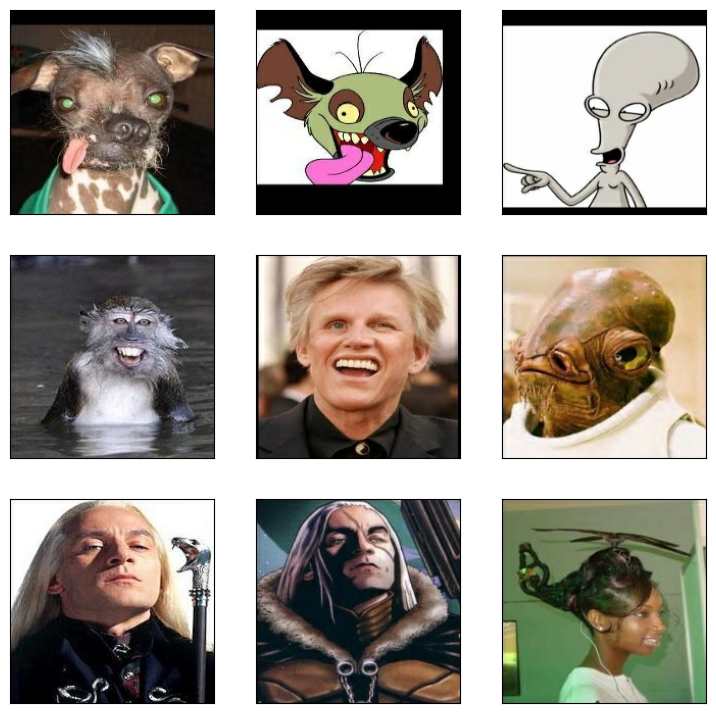

In [ ]:
def visualize(anchor, positive, negative):
    """Visualize a few triplets from the supplied batches."""

    def show(ax, image):
        ax.imshow(image)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    fig = plt.figure(figsize=(9, 9))

    axs = fig.subplots(3, 3)
    for i in range(3):
        show(axs[i, 0], anchor[i])
        show(axs[i, 1], positive[i])
        show(axs[i, 2], negative[i])


visualize(*list(train_dataset.take(1).as_numpy_iterator())[0])

In [ ]:
base_cnn = resnet.ResNet50(
    weights="imagenet", input_shape=target_shape + (3,), include_top=False
)

flatten = layers.Flatten()(base_cnn.output)
dense1 = layers.Dense(512, activation="relu")(flatten)
dense1 = layers.BatchNormalization()(dense1)
dense2 = layers.Dense(256, activation="relu")(dense1)
dense2 = layers.BatchNormalization()(dense2)
output = layers.Dense(256)(dense2)

embedding = Model(base_cnn.input, output, name="Embedding")

trainable = False
for layer in base_cnn.layers:
    if layer.name == "conv5_block1_out":
        trainable = True
    layer.trainable = trainable

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
class DistanceLayer(layers.Layer):
    """
    This layer is responsible for computing the distance between the anchor
    embedding and the positive embedding, and the anchor embedding and the
    negative embedding.
    """

    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, anchor, positive, negative):
        ap_distance = tf.reduce_sum(tf.square(anchor - positive), -1)
        an_distance = tf.reduce_sum(tf.square(anchor - negative), -1)
        return (ap_distance, an_distance)


anchor_input = layers.Input(name="anchor", shape=target_shape + (3,))
positive_input = layers.Input(name="positive", shape=target_shape + (3,))
negative_input = layers.Input(name="negative", shape=target_shape + (3,))

distances = DistanceLayer()(
    embedding(resnet.preprocess_input(anchor_input)),
    embedding(resnet.preprocess_input(positive_input)),
    embedding(resnet.preprocess_input(negative_input)),
)

siamese_network = Model(
    inputs=[anchor_input, positive_input, negative_input], outputs=distances
)

In [ ]:
class SiameseModel(Model):
    """The Siamese Network model with a custom training and testing loops.

    Computes the triplet loss using the three embeddings produced by the
    Siamese Network.

    The triplet loss is defined as:
       L(A, P, N) = max(‖f(A) - f(P)‖² - ‖f(A) - f(N)‖² + margin, 0)
    """

    def __init__(self, siamese_network, margin=0.5):
        super().__init__()
        self.siamese_network = siamese_network
        self.margin = margin
        self.loss_tracker = metrics.Mean(name="loss")

    def call(self, inputs):
        return self.siamese_network(inputs)

    def train_step(self, data):
        # GradientTape is a context manager that records every operation that
        # you do inside. We are using it here to compute the loss so we can get
        # the gradients and apply them using the optimizer specified in
        # `compile()`.
        with tf.GradientTape() as tape:
            loss = self._compute_loss(data)

        # Storing the gradients of the loss function with respect to the
        # weights/parameters.
        gradients = tape.gradient(loss, self.siamese_network.trainable_weights)

        # Applying the gradients on the model using the specified optimizer
        self.optimizer.apply_gradients(
            zip(gradients, self.siamese_network.trainable_weights)
        )

        # Let's update and return the training loss metric.
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

    def test_step(self, data):
        loss = self._compute_loss(data)

        # Let's update and return the loss metric.
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

    def _compute_loss(self, data):
        # The output of the network is a tuple containing the distances
        # between the anchor and the positive example, and the anchor and
        # the negative example.
        ap_distance, an_distance = self.siamese_network(data)

        # Computing the Triplet Loss by subtracting both distances and
        # making sure we don't get a negative value.
        loss = ap_distance - an_distance
        loss = tf.maximum(loss + self.margin, 0.0)
        return loss

    @property
    def metrics(self):
        # We need to list our metrics here so the `reset_states()` can be
        # called automatically.
        return [self.loss_tracker]

In [ ]:
siamese_model = SiameseModel(siamese_network)
siamese_model.compile(optimizer=optimizers.Adam(0.0001), weighted_metrics=[tf.keras.losses.categorical_crossentropy])
siamese_model.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
151/151 [==============================] - 102s 496ms/step - loss: 0.4950 - val_loss: 0.3880
Epoch 2/10
151/151 [==============================] - 74s 491ms/step - loss: 0.3941 - val_loss: 0.3753
Epoch 3/10
151/151 [==============================] - 75s 495ms/step - loss: 0.3738 - val_loss: 0.3508
Epoch 4/10
151/151 [==============================] - 73s 486ms/step - loss: 0.3575 - val_loss: 0.3414
Epoch 5/10
151/151 [==============================] - 74s 492ms/step - loss: 0.3333 - val_loss: 0.3484
Epoch 6/10
151/151 [==============================] - 74s 490ms/step - loss: 0.3354 - val_loss: 0.3209
Epoch 7/10
151/151 [==============================] - 74s 492ms/step - loss: 0.3106 - val_loss: 0.3198
Epoch 8/10
151/151 [==============================] - 74s 491ms/step - loss: 0.3012 - val_loss: 0.3032
Epoch 9/10
151/151 [==============================] - 74s 493ms/step - loss: 0.2947 - val_loss: 0.3059
Epoch 10/10
151/151 [==============================] - 73s 486ms/step - 

In [ ]:
siamese_model.save_weights('/content/drive/MyDrive/weights.h5')

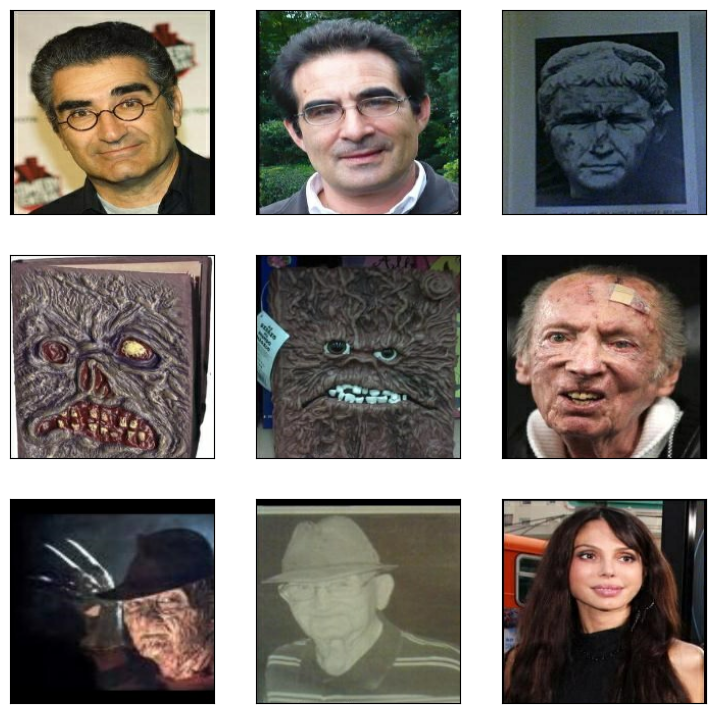

In [ ]:
sample = next(iter(train_dataset))
visualize(*sample)

anchor, positive, negative = sample
anchor_embedding, positive_embedding, negative_embedding = (
    embedding(resnet.preprocess_input(anchor)),
    embedding(resnet.preprocess_input(positive)),
    embedding(resnet.preprocess_input(negative)),
)

In [ ]:
cosine_similarity = metrics.CosineSimilarity()

positive_similarity = cosine_similarity(anchor_embedding, positive_embedding)
print("Positive similarity:", positive_similarity.numpy())

negative_similarity = cosine_similarity(anchor_embedding, negative_embedding)
print("Negative similarity", negative_similarity.numpy())

Positive similarity: 0.9963027
Negative similarity 0.9940153


In [ ]:
tf.saved_model.save(siamese_model, '/content/drive/MyDrive/model/')

In [ ]:
model = tf.saved_model.load('/content/drive/MyDrive/model/')

In [ ]:
# from PIL import Image
# from torchvision import transforms
# import torch
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# def img_to_encoding(image_path, model):
#     ### Open image (1 line and resize to (96,96))
#     img = Image.open(image_path).convert('RGB').resize((96,96))

#     ### Transform image to tensor and normalize it (use transforms.Compose )
#     transform = transforms.Compose([transforms.ToTensor(),
#     transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])])

#     ### pass image to device
#     img = transform(img).to(device)

#     ### pass the image to the model
#     img_embedding = model(img.unsqueeze(0))

#     return img_embedding.detach().cpu()
# database = {}
# database["jason"] = img_to_encoding("/content/drive/MyDrive/images/jason/jason.png", model)
# database["hoang"] = img_to_encoding("/content/drive/MyDrive/images/hoang/hoang.jpeg", model)
# database["quoc"] = img_to_encoding("/content/drive/MyDrive/images/quoc/quoc.jpeg", model)
# database["thanh"] = img_to_encoding("/content/drive/MyDrive/images/thanh/thanh.png", model)
# database["ngoc"] = img_to_encoding("/content/drive/MyDrive/images/ngoc/ngoc.png", model)
# database["tuan"] = img_to_encoding("/content/drive/MyDrive/images/tuan/tuan.jpeg", model)

# def who_is_it(image_path, database, model):
#     """
#     Implements face recognition for the happy house by finding who is the person on the image_path image.

#     Arguments:
#     image_path -- path to an image
#     database -- database containing image encodings along with the name of the person on the image
#     model -- your Inception model instance in Keras

#     Returns:
#     min_dist -- the minimum distance between image_path encoding and the encodings from the database
#     identity -- string, the name prediction for the person on image_path
#     """

#     ### START CODE HERE ###

#     ## Step 1: Compute the target "encoding" for the image. Use img_to_encoding() see example above. ## (≈ 1 line)
#     enc = img_to_encoding(image_path,model)

#     ## Step 2: Find the closest encoding ##
#     min_dist = 100
#     identity = "fluff"

#     # Initialize "min_dist" to a large value, say 100 (≈1 line)
#     for (name,db_enc) in database.items():
#         d = np.linalg.norm(enc - db_enc)
#         if d < min_dist :
#             min_dist = d
#             identity = name

#     # Loop over the database dictionary's names and encodings.

#         # Compute L2 distance between the target "encoding" and the current "emb" from the database. (≈ 1 line)

#         # If this distance is less than the min_dist, then set min_dist to dist, and identity to name. (≈ 3 lines)

#     ### END CODE HERE ###

#     if min_dist > 0.7:
#         print("Not in the database.")
#     else:
#         print ("it's " + str(identity) + ", the distance is " + str(min_dist))

#     return min_dist, identity
# who_is_it("/content/drive/MyDrive/images/2.jpg", database, model)